In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

Mounted at /content/drive/
/content/drive/My Drive/Thesis


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve
from scipy.stats import pareto

In [15]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [ ]:
# Experiment pareto distribution:
# for x>=1 , c>2.
np.random.seed(5)
n = 1000000
c = 20
u, var = pareto.stats(c, moments='mv')
sigma  = np.sqrt(var)
print('u ='+ str(u))
print(sigma)
#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u
print('r = ' + str(r))
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(p_d)
# np.isclose(F(x), [ 0.0])


bid_pareto = pareto.rvs(c,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
print(reserve_p) 
 #opt should also be in the experiment, one is average and another sum of it. 
opt = 1
exp_revenue = auction_exp(bid_pareto,reserve_p)
u_revenue = auction_exp(bid_pareto,u)
DAPX_u = opt/u_revenue
DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('pareto distribution DAPX = ' + str(DAPX))
print('using mean DAPX = ' + str(DAPX_u))
print("Theoritically the DAPX_pareto:")


u =1.0526315789473684
0.05547855544155052
r = 0.052704627669472995
[1.17103387]
[0.91848362]
worst case robust DAPX = [1.17103387]
pareto distribution DAPX = [1.08875105]
using mean DAPX = 2.6457163068032354
Theoritically the DAPX_pareto:


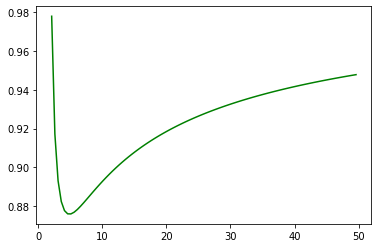

In [ ]:

b_list = np.arange(2.1, 50, 0.5)
reserve_p_list = []

for b in b_list:
  u, var = pareto.stats(b, moments='mv')
  sigma = np.sqrt(var)
  r = sigma/u
  p_d =  fsolve(F, [u])

  reserve_p_list.append(p_d*u/(2*p_d-1))


plt.plot(b_list, reserve_p_list,color="green",label="reverse price VS parameter b")



In [ ]:
# Experiment pareto distribution:
# for x>=1 , c>2.
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list = []
step1 = np.arange(0, 0.01, 0.001)
step1 = np.arange(0.01, 0.5, 0.01)
step2 = np.arange(0.5, 1, 0.1)
step = np.concatenate((step1, step2))
n = 100000
for i in step:
  c = 2.001 + i
  c_list.append(c)
  u, var = pareto.stats(c, moments='mv')
  sigma = np.sqrt(var)
  data_pareto= pareto.rvs(c,size=n)

  r = sigma/u
  r_list.append(r)

  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt = 1
  exp_revenue = auction_exp(data_pareto,reserve_p)

  DAPX_pareto.append((opt/exp_revenue)[0])  

In [27]:
# Experiment pareto distribution:
# for x>=1 , c>2.
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   

def FC(x):
   return  r**2 - 1/(x*(x-2))   


sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list = []
step = np.linspace(0.01,10,50)

n = 100000
for i in step:
  r = i
  c = 1+np.sqrt(1+1/(r**2))
  c_list.append(c)
  u, var = pareto.stats(c, moments='mv')
  sigma = np.sqrt(var)
  data_pareto= pareto.rvs(c,size=n)

  r = sigma/u
  r_list.append(r)

  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt = 1
  exp_revenue = auction_exp(data_pareto,reserve_p)

  DAPX_pareto.append((opt/exp_revenue)[0])  

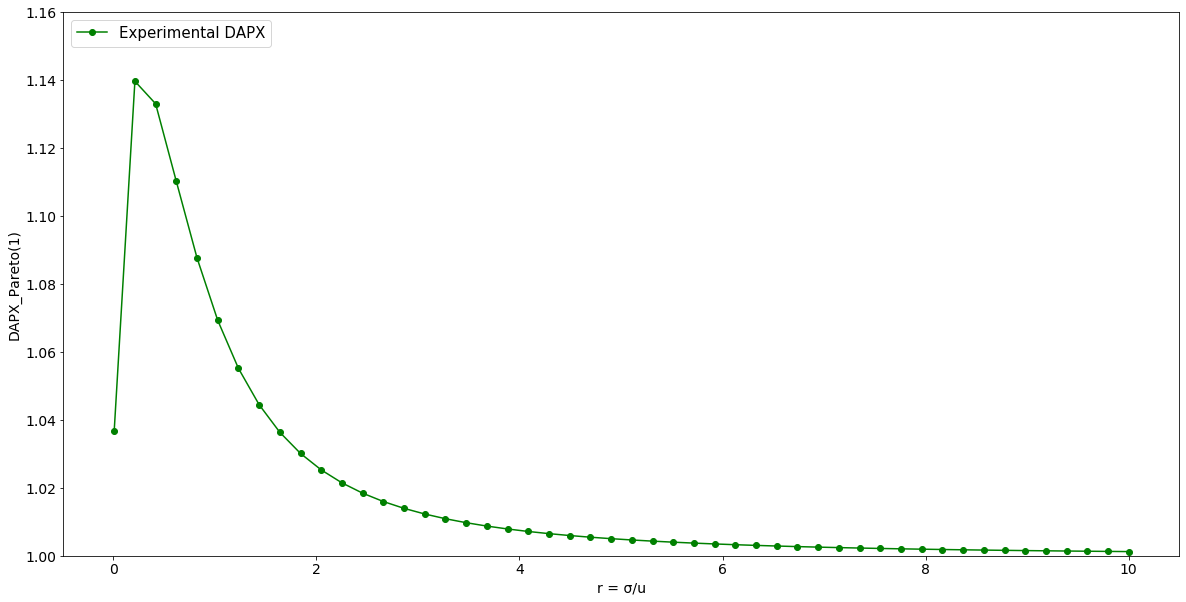

In [28]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_pareto,color="green",marker="o",label="Experimental DAPX")
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX_Pareto(1)",fontsize=14)
ax.set_ylim(1,1.16)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")

plt.legend(loc="upper left",fontsize = 15)
plt.savefig("pareto_dapx2.png",bbox_inches='tight')
plt.show()


In [9]:
len(r_list)

50

NameError: ignored

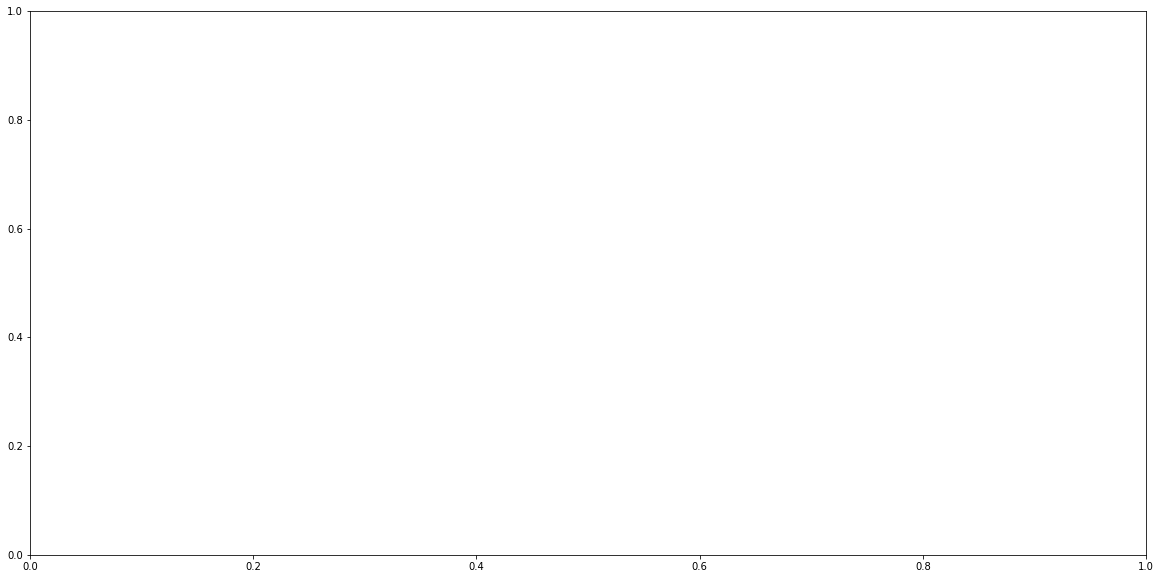

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_pareto,color="green",marker="o",label="Experimental DAPX")
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=14)
# set y-axis label
ax.set_ylabel("Robust ratio value",fontsize=14)
#ax.set_ylim(1,3)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
#ax2.set_ylabel("p_d",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 15,bbox_to_anchor=(0,1))
plt.savefig("pareto_dapx_s.png")
plt.show()


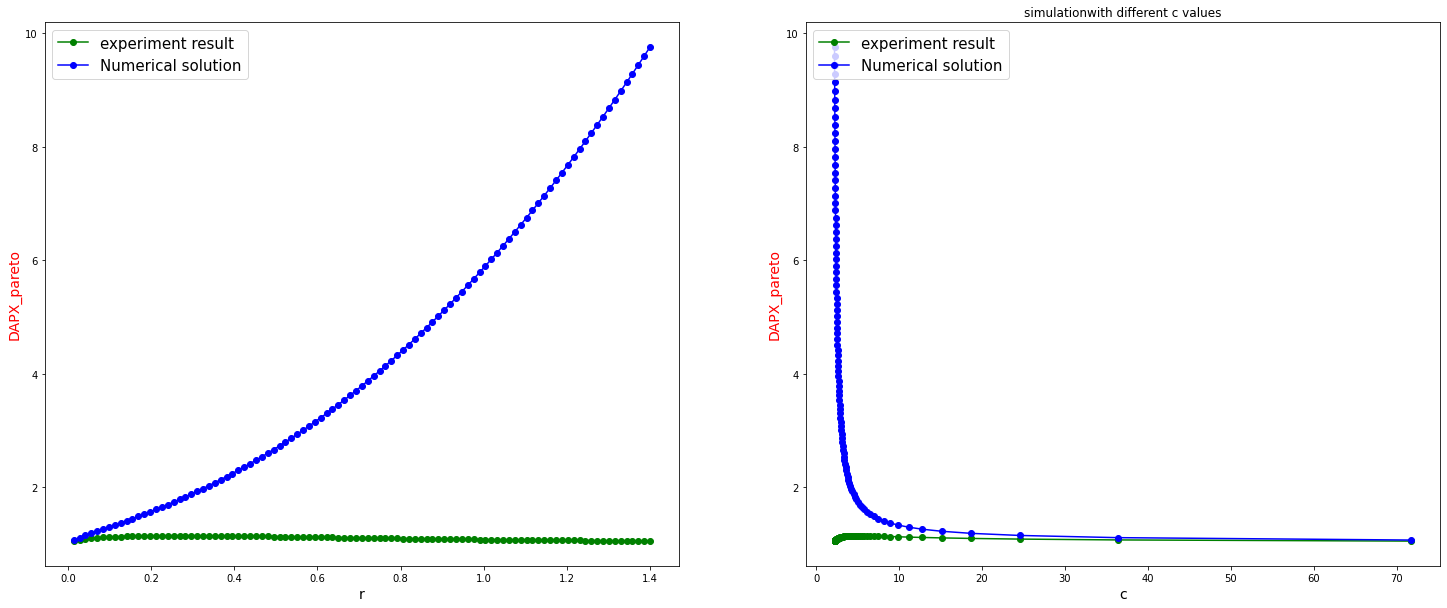

In [ ]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list, DAPX_pareto,color="green",marker="o",label="experiment result")
ax1.set_xlabel("r",fontsize=14)
ax1.set_ylabel("DAPX_pareto",color="red",fontsize=14)
ax1.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")

ax2.plot(c_list, DAPX_pareto,color="green",marker="o",label="experiment result")
ax2.set_xlabel("c",fontsize=14)
ax2.set_ylabel("DAPX_pareto",color="red",fontsize=14)
ax2.plot(c_list, p_d_list,color="blue",marker="o",label="Numerical solution")

plt.title('simulation'+ 'with different c values')

ax1.legend(loc="upper left",fontsize = 15)
ax2.legend(loc="upper left",fontsize = 15)

plt.show()


In [ ]:
# Experiment different pareto distribution:
# for x>=0 , c>2, so we have mean and standard deviation the variable is x - 1
np.random.seed(5)
n = 1000000
c = 10000000000
u, var = pareto.stats(c, moments='mv')
sigma = np.sqrt(var)
#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/(u-1)
print('r = ' + str(r))
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(F(p_d))
# np.isclose(F(x), [ 0.0])


bid_pareto = pareto.rvs(c,size=n)
#p_d = 1 + 4* (sigma/u)**2
opt_p = 1/(c-1)
reserve_p = p_d*(u-1)/(2*p_d-1)
print(reserve_p) 

opt_revenue = auction_exp(bid_pareto-1,opt_p)
exp_revenue = auction_exp(bid_pareto-1,reserve_p)

DAPX = opt_revenue/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('pareto distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_pareto:")


r = 0.9999999174596359
[-1.11022302e-16]
[5.466024e-11]
worst case robust DAPX = [5.86453584]
pareto distribution DAPX = [1.16382319]
Theoritically the DAPX_pareto:


In [4]:
# Experiment different pareto distribution with change in c
# for x>=0 , c>2.
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list = []
step = np.arange(0, 1, 0.01)
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            
n = 100000
for i in step:
  c = 2.01 + i
  c_list.append(c)
  u, var = pareto.stats(c, moments='mv')
  sigma = np.sqrt(var)
  bid_pareto= pareto.rvs(c,size=n)

  r = sigma/(u-1)
  r_list.append(r)

  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  #print(F(p_d))
  p_d_list.append(p_d)
  reserve_p = p_d*(u-1)/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt_p = 1/(c-1)
  opt_revenue = auction_exp(bid_pareto-1,opt_p)
  exp_revenue = auction_exp(bid_pareto - 1,reserve_p)
  #print(exp_revenue)
  DAPX_pareto.append(opt_revenue/exp_revenue)  

In [28]:
# Experiment different pareto distribution with change in r
# for x>=0 , c>2.
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2  
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
c_list = []
opt_p_list = []
opt_revenue_list = []
exp_revenue_list =[]
step = np.linspace(1.0001, 10, 50)
n = 1000000
for i in step:
  c = 2*i**2/(i**2-1)
  c_list.append(c)
  u, var = pareto.stats(c, moments='mv')
  sigma = np.sqrt(var)
  bid_pareto= pareto.rvs(c,size=n)

  r = sigma/(u-1)
  r_list.append(r)

  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  print(F(p_d))
  p_d_list.append(p_d)
  reserve_p = p_d*(u-1)/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt_p = 1/(c-1)
  opt_p_list.append(opt_p)
  opt_revenue = auction_exp(bid_pareto-1,opt_p)
  opt_revenue_list.append(opt_revenue)
  exp_revenue = auction_exp(bid_pareto-1,reserve_p)
  exp_revenue_list.append(exp_revenue)
  #print(exp_revenue)
  DAPX_pareto.append(opt_revenue/exp_revenue)  

[2.22044605e-16]
[1.11022302e-15]
[-4.4408921e-16]
[0.]
[-1.33226763e-15]
[0.]
[-8.8817842e-16]
[0.]
[0.]
[8.8817842e-16]
[0.]
[0.]
[-1.77635684e-15]
[1.77635684e-15]
[0.]
[0.]
[1.77635684e-15]
[0.]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[0.]
[3.55271368e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.10542736e-15]
[0.]
[7.10542736e-15]
[0.]
[-7.10542736e-15]
[-7.10542736e-15]
[7.10542736e-15]
[-7.10542736e-15]
[1.42108547e-14]
[-1.42108547e-14]
[1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
[0.]
[-1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]


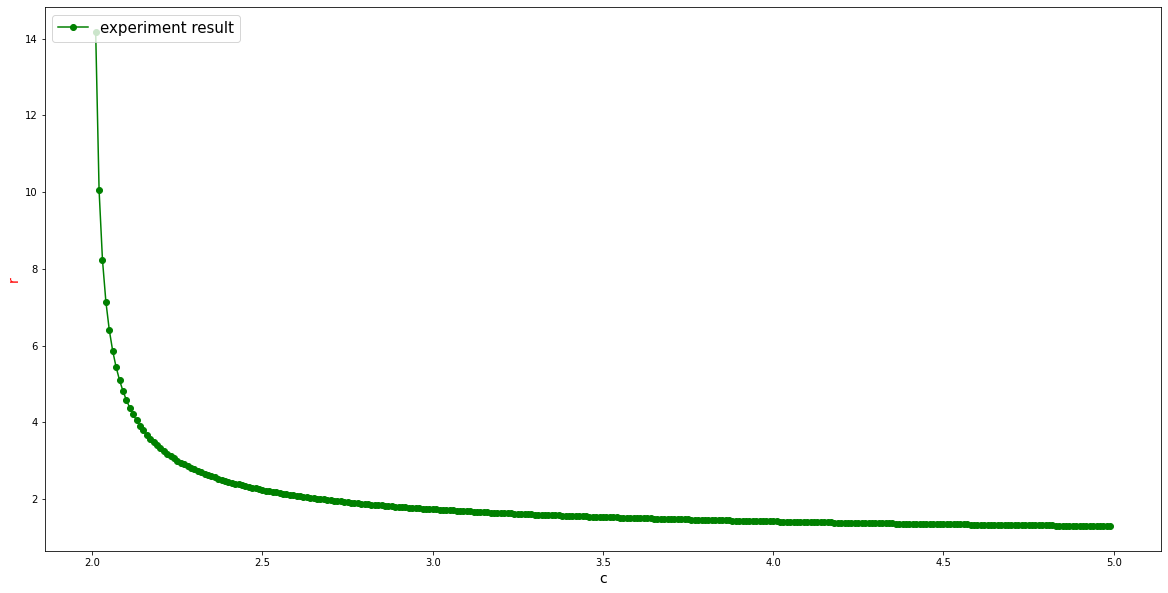

In [ ]:
# create figure and axis objects with subplots()
x = np.arange(2.01, 5, 0.01)
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(x, np.sqrt(x/(x-2)),color="green",marker="o",label="experiment result")
# set x-axis label
ax.set_xlabel("c",fontsize=14)
# set y-axis label
ax.set_ylabel("r",color="red",fontsize=14)
plt.legend(loc="upper left",fontsize = 15)

plt.show()

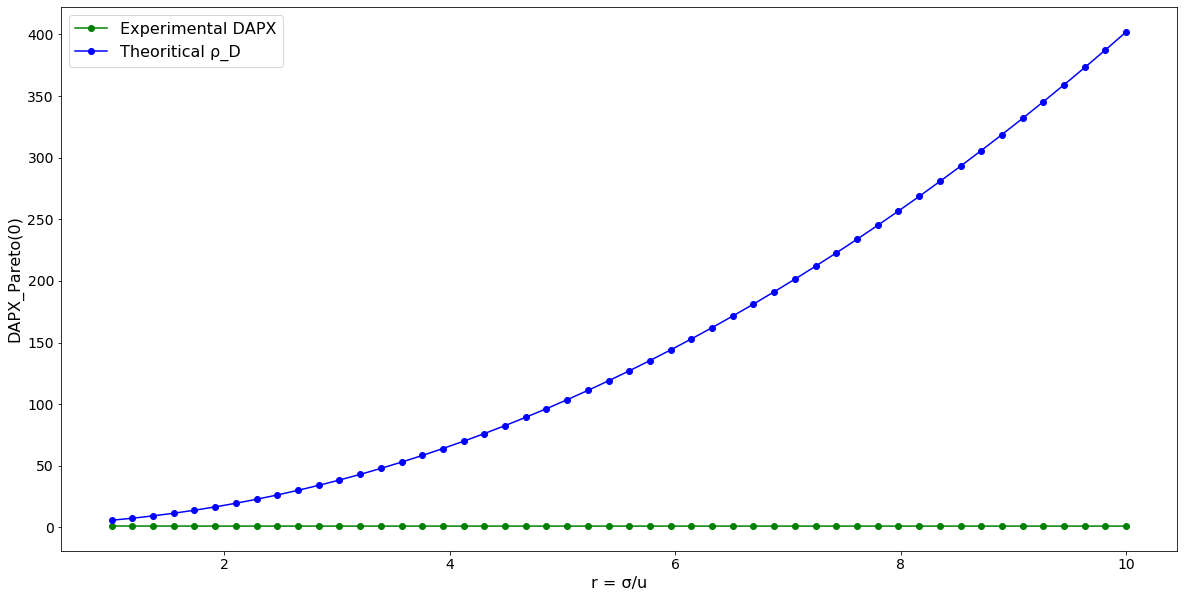

In [30]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(r_list, DAPX_pareto,color="green",marker="o",label="Experimental DAPX")
# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=16)
# set y-axis label
ax.set_ylabel("DAPX_Pareto(0)",fontsize=16)
#ax.set_ylim(0.5,8)
ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)

plt.legend(loc="upper left",fontsize = 16)
plt.savefig("pareto_dapx_r_large.png",bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd 
  
# creating the DataFrame 
my_df = { 'r' : r_list,
          'opt_revenue_list': opt_revenue_list,
         'exp_revenue_list': exp_revenue_list 
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('pareto.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 



CSV String:
 None


In [3]:
#plot dapx of pareto(0) theoritically
reserve_p_list = []
r_list=[]
c_list=[]
D =[]
def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2 
for i in np.linspace(1.0001, 50, 500):
    c = 2*i**2/(i**2-1)
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    r = sigma/(u-1)
    r_list.append(r)
    p_d = fsolve(F, [u])
    print(F(p_d))
    reserve_p = p_d*(u-1)/(2*p_d-1)
    reserve_p_list.append(reserve_p)
    n = (c-1)**(c-1)*((reserve_p+1)**c)
    D.append(n/(reserve_p*(c**c)))




[2.22044605e-16]
[0.]
[6.66133815e-16]
[0.]
[2.22044605e-16]
[0.]
[0.]
[-4.4408921e-16]
[-8.8817842e-16]
[4.4408921e-16]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[8.8817842e-16]
[0.]
[0.]
[-1.77635684e-15]
[-1.77635684e-15]
[0.]
[-1.77635684e-15]
[0.]
[0.]
[1.77635684e-15]
[-1.77635684e-15]
[1.77635684e-15]
[-1.77635684e-15]
[0.]
[-1.77635684e-15]
[0.]
[0.]
[0.]
[3.55271368e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[0.]
[0.]
[0.]
[0.]
[7.10542736e-15]
[1.42108547e-14]
[0.]
[0.]
[0.]
[0.]
[1.42108547e-14]
[-7.10542736e-15]
[7.10542736e-15]
[1.42108547e-14]
[0.]
[0.]
[-1.42108547e-14]
[0.]
[1.42108547e-14]
[0.]
[-7.10542736e-15]
[0.]
[0.]
[-7.10542736e-15]
[-7.10542736e-15]
[0.]
[0.]
[1.42108547e-14]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.42108547e-14]
[-1.42108547e-14]
[-1.42108547e-14]
[-1.42108547e-14]
[0.]
[1.42108547e-14]
[0.]
[0.]
[-1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
[-2.84217094e-14]
[0.]
[-1.42108547e-14]
[-

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


[-1.13686838e-13]
[0.]
[1.13686838e-13]
[-1.13686838e-13]
[0.]
[-1.13686838e-13]
[0.]
[0.]
[1.13686838e-13]
[0.]
[0.]
[1.13686838e-13]
[0.]
[0.]
[0.]
[1.13686838e-13]
[0.]
[0.]
[-1.13686838e-13]
[1.13686838e-13]
[0.]
[1.13686838e-13]
[1.13686838e-13]
[0.]
[0.]
[0.]
[0.]
[2.27373675e-13]
[-2.27373675e-13]
[-2.27373675e-13]
[0.]
[2.27373675e-13]
[0.]
[0.]
[0.]
[0.]
[2.27373675e-13]
[0.]
[2.27373675e-13]
[0.]
[0.]
[0.]
[2.27373675e-13]
[0.]
[0.]
[0.]
[2.27373675e-13]
[0.]
[2.27373675e-13]
[0.]
[0.]
[0.]
[0.]
[2.27373675e-13]
[2.27373675e-13]
[0.]
[0.]
[0.]
[0.]
[-2.27373675e-13]
[-2.27373675e-13]
[0.]
[0.]
[0.]
[2.27373675e-13]
[-2.27373675e-13]
[0.]
[2.27373675e-13]
[0.]
[-2.27373675e-13]
[0.]
[0.]
[2.27373675e-13]
[0.]
[0.]
[2.27373675e-13]
[2.27373675e-13]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-2.27373675e-13]
[0.]
[0.]
[-2.27373675e-13]
[0.]
[0.]
[0.]
[0.]
[0.]
[-2.27373675e-13]
[0.]
[-2.27373675e-13]
[0.]
[-2.27373675e-13]
[-2.27373675e-13]
[2.27373675e-13]
[0.]
[4.54747351e-13]
[-2.27

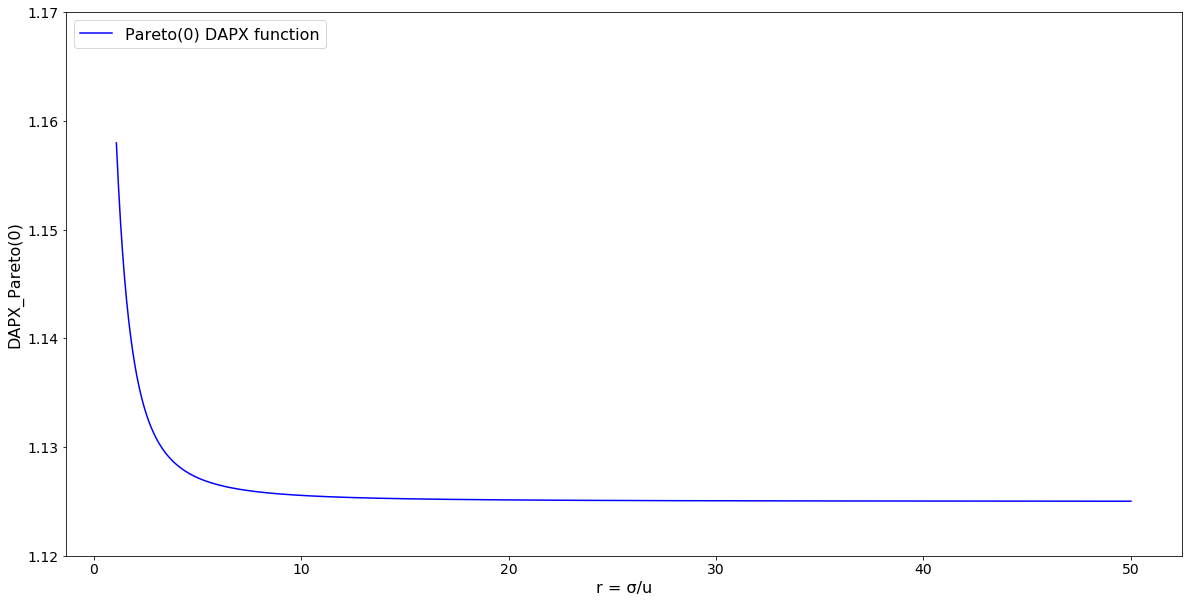

In [11]:
fig,ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("r = \u03C3/u",fontsize=16)
# set y-axis label
ax.set_ylabel("DAPX_Pareto(0)",fontsize=16)
ax.set_ylim(1.12,1.17)
ax.plot(r_list, D,color="blue",label="Pareto(0) DAPX function")
#ax.plot(r_list, x,color="red",marker="o",label="Numerical solution")
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 16)
plt.savefig("pareto_dapx_r.png")
plt.show()

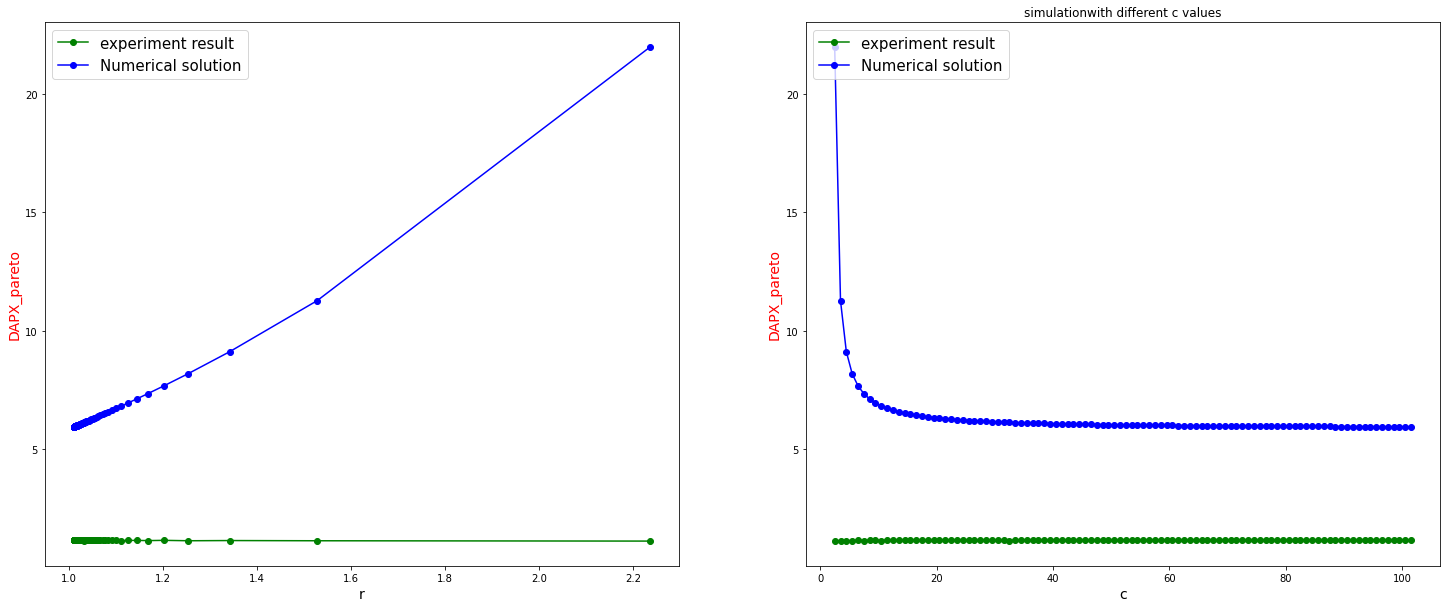

In [ ]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list, DAPX_pareto,color="green",marker="o",label="experiment result")
ax1.set_xlabel("r",fontsize=14)
ax1.set_ylabel("DAPX_pareto",color="red",fontsize=14)
ax1.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")

ax2.plot(c_list, DAPX_pareto,color="green",marker="o",label="experiment result")
ax2.set_xlabel("c",fontsize=14)
ax2.set_ylabel("DAPX_pareto",color="red",fontsize=14)
ax2.plot(c_list, p_d_list,color="blue",marker="o",label="Numerical solution")

plt.title('simulation'+ 'with different c values')

ax1.legend(loc="upper left",fontsize = 15)
ax2.legend(loc="upper left",fontsize = 15)

plt.show()


In [ ]:
#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(r_list, DAPX_uniform, 2))
#add fitted polynomial line to scatterplot
polyline = np.linspace(0.2, 0.5, 50)


fit1 = np.polyfit(r_list, DAPX_uniform, 2,full=True)
print(fit1)
fit2 = np.polyfit(r_list, DAPX_uniform, 3,full=True)
print(fit2)
fit3 = np.polyfit(r_list, DAPX_uniform, 4,full=True)
print(fit3)

(array([ 1.27229331, -0.39635363,  1.01584743]), array([5.60044326e-05]), 3, array([1.71814986, 0.21878689, 0.00966222]), 1.7763568394002505e-14)
(array([-3.73383765,  5.40248018, -1.8945457 ,  1.19391765]), array([2.19689157e-05]), 4, array([1.97328182e+00, 3.25064010e-01, 2.21740390e-02, 7.45486096e-04]), 1.7763568394002505e-14)
(array([  6.89949469, -13.90967817,  10.96536408,  -3.22994957,
         1.31265908]), array([2.16445001e-05]), 5, array([2.19419460e+00, 4.28980345e-01, 3.84984450e-02, 1.94940221e-03,
       5.51017290e-05]), 1.7763568394002505e-14)


Using 32 layers of radial flow should lead to a good reasonable fit of the data after 500 epochs. Traning with more layers and for more epochs would improve the density estimation but would take more time.